In [3]:
import pandas as pd 
from sklearn.preprocessing import StandardScaler, LabelEncoder 
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

In [4]:
basketball_data = pd.read_csv("basketball.csv")
basketball_data

,Player_Name,Minutes_Played,Points_Scored,Assists,Rebounds,Steals,Blocks,Turnovers,Field_Goal_Percentage,Three_Point_Percentage,Free_Throw_Percentage,Efficiency_Rating,Plus_Minus,Game_Outcome,Injury_Status
0,LeBron James,38,30,11,8,2,1,3,0.55,0.40,0.80,35,15,Win,Healthy
1,Stephen Curry,35,35,7,4,3,0,2,0.60,0.50,0.90,38,12,Win,Healthy
2,Kevin Durant,36,28,5,7,1,2,4,0.50,0.35,0.85,30,8,Win,Injured
3,Giannis Antetokounmpo,37,25,8,12,2,3,5,0.45,0.20,0.70,32,10,Loss,Healthy
4,Luka Doncic,40,32,10,6,1,0,4,0.52,0.38,0.75,31,5,Loss,Injured
5,Kawhi Leonard,34,26,4,5,3,1,1,0.65,0.45,0.82,33,7,Win,Healthy
6,Joel Embiid,39,24,2,15,0,4,3,0.48,0.30,0.78,29,6,Loss,Injured
7,Nikola Jokic,36,20,12,10,2,1,2,0.58,0.42,0.85,34,9,Win,Healthy
8,Damian Lillard,35,33,8,3,2,0,3,0.55,0.45,0.88,36,11,Win,Healthy
9,James Harden,38,27,11,7,2,1,5,0.42,0.33,0.86,28,4,Loss,Healthy


In [5]:
data = basketball_data.drop(columns=['Player_Name'])

In [6]:
data

,Minutes_Played,Points_Scored,Assists,Rebounds,Steals,Blocks,Turnovers,Field_Goal_Percentage,Three_Point_Percentage,Free_Throw_Percentage,Efficiency_Rating,Plus_Minus,Game_Outcome,Injury_Status
0,38,30,11,8,2,1,3,0.55,0.40,0.80,35,15,Win,Healthy
1,35,35,7,4,3,0,2,0.60,0.50,0.90,38,12,Win,Healthy
2,36,28,5,7,1,2,4,0.50,0.35,0.85,30,8,Win,Injured
3,37,25,8,12,2,3,5,0.45,0.20,0.70,32,10,Loss,Healthy
4,40,32,10,6,1,0,4,0.52,0.38,0.75,31,5,Loss,Injured
5,34,26,4,5,3,1,1,0.65,0.45,0.82,33,7,Win,Healthy
6,39,24,2,15,0,4,3,0.48,0.30,0.78,29,6,Loss,Injured
7,36,20,12,10,2,1,2,0.58,0.42,0.85,34,9,Win,Healthy
8,35,33,8,3,2,0,3,0.55,0.45,0.88,36,11,Win,Healthy
9,38,27,11,7,2,1,5,0.42,0.33,0.86,28,4,Loss,Healthy


In [7]:
categorical_columns = ['Injury_Status','Game_Outcome']
label_encoder = {}
for col in categorical_columns:
    le = LabelEncoder()
    data[col] = le.fit_transform(data[col])
    label_encoder[col]= le

In [8]:
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data)

In [9]:
inertia = []
cluster_range = range(1, 11)
for k in cluster_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(data_scaled)
    inertia.append(kmeans.inertia_)

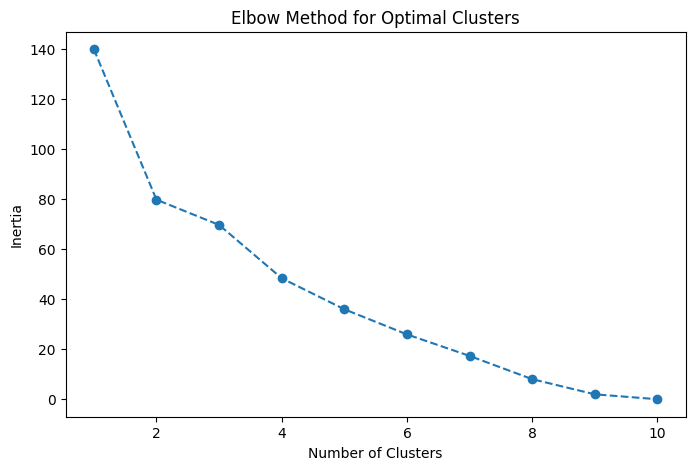

In [10]:
plt.figure(figsize=(8, 5))
plt.plot(cluster_range, inertia, marker='o', linestyle='--')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.title('Elbow Method for Optimal Clusters')
plt.show()

In [11]:
optimal_clusters = 3
kmeans = KMeans(n_clusters=optimal_clusters, random_state=42)
clusters = kmeans.fit_predict(data_scaled)

In [12]:
basketball_data['Cluster'] = clusters

In [13]:
print(basketball_data.head())

             Player_Name  Minutes_Played  Points_Scored  Assists  Rebounds  \
0           LeBron James              38             30       11         8   
1          Stephen Curry              35             35        7         4   
2           Kevin Durant              36             28        5         7   
3  Giannis Antetokounmpo              37             25        8        12   
4            Luka Doncic              40             32       10         6   

   Steals  Blocks  Turnovers  Field_Goal_Percentage  Three_Point_Percentage  \
0       2       1          3                   0.55                    0.40   
1       3       0          2                   0.60                    0.50   
2       1       2          4                   0.50                    0.35   
3       2       3          5                   0.45                    0.20   
4       1       0          4                   0.52                    0.38   

   Free_Throw_Percentage  Efficiency_Rating  Plus_Minus 